In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from statsmodels.api import OLS
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

C:\Users\Mohammed Yusuf Khan\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/getmykhan/toolstack/master/Datasets/Salary.csv')

In [3]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
model1 = tf.keras.Sequential()
model1.add(tf.keras.layers.Dense(1, input_shape=([1])))
model1.compile(loss='mean_squared_error', optimizer=tf.optimizers.RMSprop(1), metrics=['mean_absolute_error', 'mean_squared_error'])
model1_history = model1.fit(df['YearsExperience'], df['Salary'], epochs=12000, verbose=0)

In [5]:
model2 = tf.keras.Sequential()
model2.add(tf.keras.layers.Dense(16,input_shape=([1]), activation=tf.nn.relu))
model2.add(tf.keras.layers.Dense(32, activation=tf.nn.relu))
model2.add(tf.keras.layers.Dense(1))
model2.compile(loss='mean_squared_error', optimizer=tf.optimizers.RMSprop(0.01), metrics=['mean_absolute_error', 'mean_squared_error'])
model2_history = model2.fit(df['YearsExperience'], df['Salary'], epochs=1000, verbose=0)

In [6]:
m = OLS(df['Salary'], df['YearsExperience'])

In [7]:
result = m.fit()

In [8]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     1048.
Date:                Tue, 23 Apr 2019   Prob (F-statistic):           2.56e-24
Time:                        16:57:01   Log-Likelihood:                -327.28
No. Observations:                  30   AIC:                             656.6
Df Residuals:                      29   BIC:                             658.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
YearsExperience  1.325e+04    409.401     32.376      0.000    1.24e+04    1.41e+04
==============================================================================
Omnibus:                        0.610   Durbin-Watson:                   0.323
Prob(Omnibus):                  0.737   Jarque-Bera (JB):                0.671
Skew:                          -0.121   Prob(JB):                        0.715
Kurtosis:                       2.308   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
1.325e+04

13250.0

In [10]:
model1.get_weights()

[array([[11488.194]], dtype=float32), array([11979.816], dtype=float32)]

In [11]:
model2.get_weights();

In [12]:
df['y_pred'] = df['YearsExperience'] * 1.325e+04

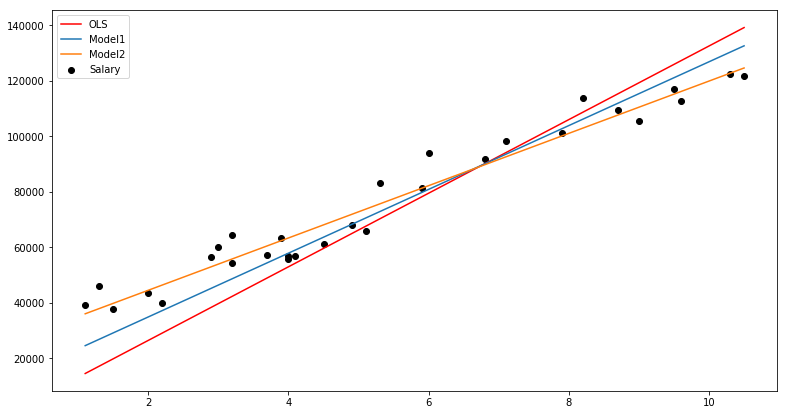

In [13]:
plt.figure(figsize=(13,7))
plt.scatter(df['YearsExperience'], df['Salary'], color='black')
plt.plot(df['YearsExperience'], result.predict(df['YearsExperience']), label = 'OLS', color='red')
plt.plot(df['YearsExperience'], [model1.predict([x])[0][0] for x in df['YearsExperience']], label ='Model1')
plt.plot(df['YearsExperience'], [model2.predict([x])[0][0] for x in df['YearsExperience']], label ='Model2')
plt.legend()

C:\Users\Mohammed Yusuf Khan\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


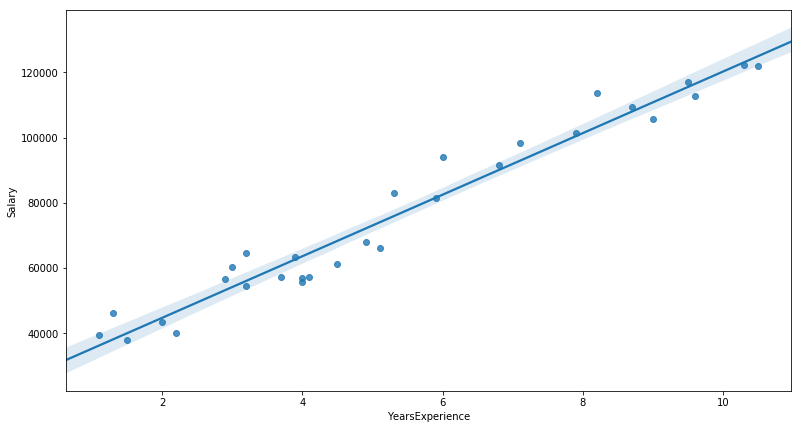

In [14]:
plt.figure(figsize=(13,7))
sns.regplot(df['YearsExperience'], df['Salary'])

In [15]:
#Ends here!